# Chat Log Classification Data Visualizations

This notebook accompanies my data analysis titled *"Chat Log Classification Using LLM"* and focuses on the code and mathematical steps used to generate the visualizations analyzing GPT-4o's classification consistency. The project investigates whether large language models can reliably categorize human-written summaries of strategic multiplayer game chats.

Three classification models were developed:

- **Model 4** allowed multi-label classification into five categories (*Coordination, Efficiency, Conflict, Inequality,* and *Unknown*) but lacked output consistency across repeated simulations.

- **Model 5** introduced mutually exclusive labeling using the same five categories and was evaluated across 20 simulations. The results were aggregated into a file named `totals_model5.csv`, which contains the frequency of each category assigned per summary.

- **Model 6** simplified the task further by limiting outputs to just two categories: *Coordination* and *Unknown*. This model was run across 100 simulations and summarized in the `totals_model6.csv` file.

Both CSVs represent summary-level label frequencies and serve as the foundation for calculating classification consistency and generating the visualizations analyzed in this notebook.

### Figure A: Model 5 Consistency Percentages.
This bar chart visualizes how many summaries achieved each level of consistency (e.g., 95%, 100%) across simulations.
For each summary, consistency was computed as the maximum count among the five
category labels divided by 20:
$$
\text{Consistency}_i = \frac{
    \max(\text{Coord}_i, \text{Eff}_i, \text{Conf}_i, \text{Ineq}_i, \text{Unk}_i)
}{20}
$$
These values were converted to percentages and grouped into bins for visualization. Higher
consistency means a summary was classified into the same category across most or all runs.

### Figure B: Model 5 Total Category Assignments.
This bar chart summarizes how often each category was assigned across all 20 simulations. The model strongly favored the labels Coordination and Unknown, which together accounted for 95.7% of all classifications:

Coordination: 67.8%

Unknown: 27.9%

Efficiency: 3.3%

Inequality: 0.9%

Conflict: 0.1%

This indicates a strong skew toward the Coordination and Unknown categories, suggesting that the model consistently preferred these classifications over the others.

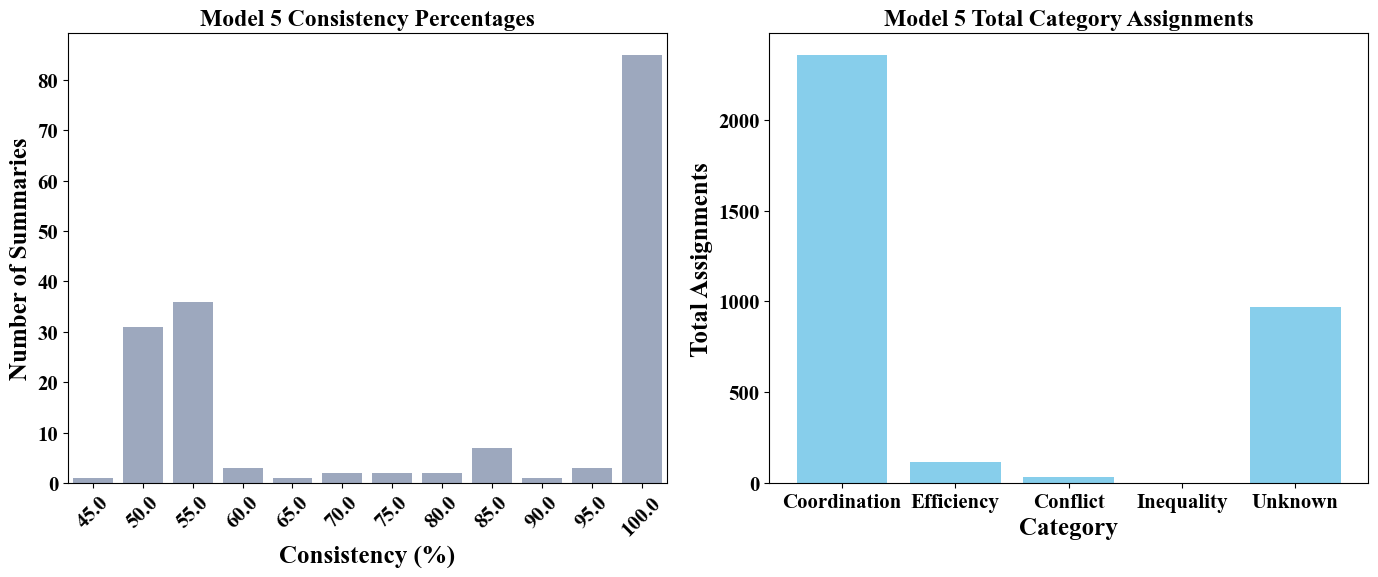

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["font.size"] = 14


df = pd.read_csv("totals_model5.csv")

category_columns = [
    "sum(coordination)", "sum(efficiency)", "sum(conflict)",
    "sum(inequality)", "sum(unknown)"
]

# --- Plot 1: Consistency Bar Chart ---
# Calculate consistency (max out of 20)
df["Consistency"] = df[category_columns].max(axis=1) / 20
df["Rounded Consistency"] = (df["Consistency"] * 100).round()
consistency_counts = df["Rounded Consistency"].value_counts().sort_index()

# --- Plot 2: Total Category Distribution ---
category_totals = df[category_columns].sum()
custom_labels = ["Coordination", "Efficiency", "Conflict", "Inequality", "Unknown"]

# --- Create Side-by-Side Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # wider canvas for 2 plots

# Plot 1: Consistency
sns.barplot(x=consistency_counts.index, y=consistency_counts.values, color='#97a6c4', ax=axes[0])
axes[0].set_title("Model 5 Consistency Percentages", fontsize=17)
axes[0].set_xlabel("Consistency (%)", fontsize=18)
axes[0].set_ylabel("Number of Summaries", fontsize=18)
axes[0].tick_params(axis='x', labelrotation=45, labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Plot 2: Total per Category
axes[1].bar(custom_labels, category_totals.values, color='skyblue')
axes[1].set_title("Model 5 Total Category Assignments", fontsize=17)
axes[1].set_xlabel("Category", fontsize=18)
axes[1].set_ylabel("Total Assignments", fontsize=18)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.savefig("model5_combined_plots.pdf", format="pdf", dpi=300)
plt.show()

### Figure C: Model 6 Consistency Percentages.
### Figure D: Model 5 vs Model 6.
In Figures C and D, to evaluate the consistency of classification results across multiple simulations, we define consistency for each summary *i* as the proportion of simulations in which the most frequently assigned category was chosen. The formulas differ based on the number of categories and simulations used in each model.

Model 5 (Five Categories, 20 Simulations):

$$
\text{Consistency}_i^{(5)} = \frac{
    \max \left(
        \text{Coord}_i, \text{Eff}_i, \text{Conf}_i, \text{Ineq}_i, \text{Unk}_i
    \right)
}{20}
$$

Model 6 (Two Categories, 100 Simulations):

$$
\text{Consistency}_i^{(6)} = \frac{
    \max \left(
        \text{Coord}_i, \text{Unk}_i
    \right)
}{100}
$$

After applying these formulas to `totals_model5.csv` and `totals_model6.csv`, we compute the average consistency:

$$
\bar{C}_{\text{Model5}} = \frac{1}{174} \sum_{i=1}^{174} \text{Consistency}_i^{(5)} = 0.6920 \quad \Rightarrow \quad \textbf{69.20\%}
$$

$$
\bar{C}_{\text{Model6}} = \frac{1}{174} \sum_{i=1}^{174} \text{Consistency}_i^{(6)} = 0.9547 \quad \Rightarrow \quad \textbf{95.47\%}
$$

This shows that **Model 6** produced significantly more consistent classifications across 100 simulations compared to **Model 5**’s 20, even though Model 5 used a more complex, multi-category schema.

The box plot for **Model 5** shows a wide range of consistency scores, with many summaries falling short of full agreement and a noticeable right skew, indicating inconsistent results across 20 simulations.

In contrast, **Model 6**, run across 100 simulations, displays a highly concentrated distribution near **100% consistency**, with minimal spread and few outliers. This highlights a clear improvement in classification reliability.

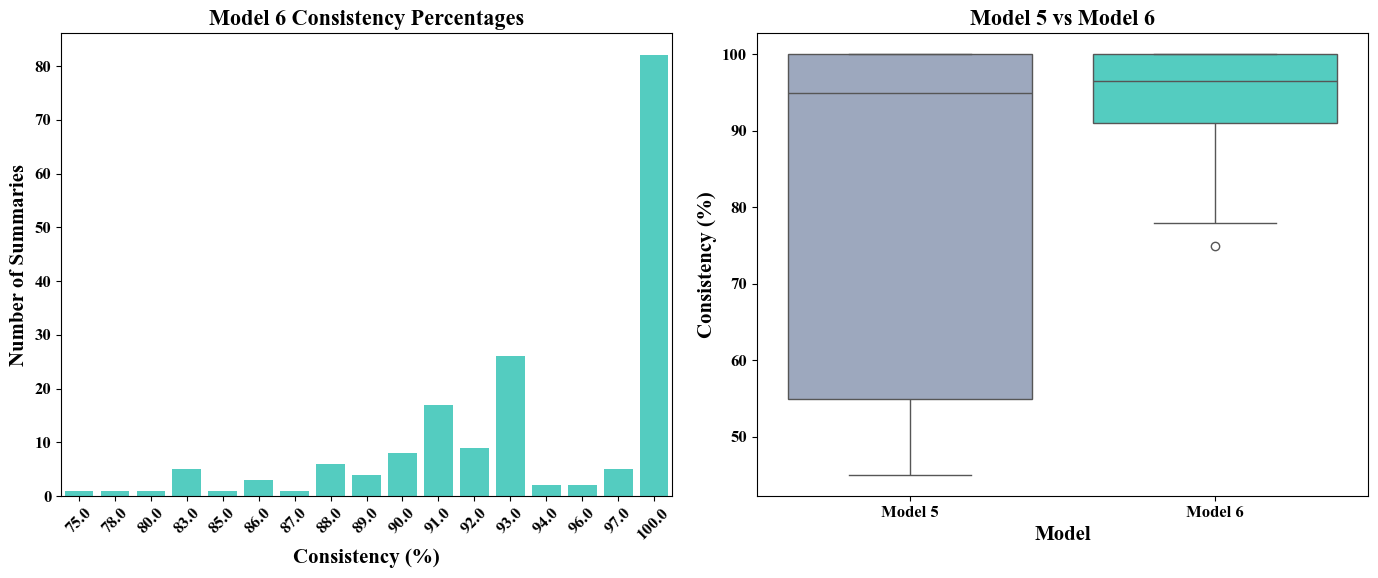

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["font.size"] = 14

df5 = pd.read_csv("totals_model5.csv")
df6 = pd.read_csv("totals_model6.csv")

model5_categories = [
    "sum(coordination)", "sum(efficiency)", "sum(conflict)",
    "sum(inequality)", "sum(unknown)"
]

# Consistency for Model 5 (20 simulations)
df5["Consistency"] = df5[model5_categories].max(axis=1) / 20

# Consistency for Model 6 (100 simulations)
df6["Consistency"] = df6[["Coordination", "Unknown"]].max(axis=1) / 100

# ---- PLOT SETUP ----
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 2 plots side by side

# --- Plot 1: Model 6 Bar Plot ---
df6["Rounded Consistency"] = (df6["Consistency"] * 100).round()
consistency_counts = df6["Rounded Consistency"].value_counts().sort_index()

sns.barplot(x=consistency_counts.index,
            y=consistency_counts.values,
            color='turquoise',
            ax=axes[0])

axes[0].set_title("Model 6 Consistency Percentages", fontsize=16, weight="bold")
axes[0].set_xlabel("Consistency (%)", fontsize=15, weight="bold")
axes[0].set_ylabel("Number of Summaries", fontsize=15, weight="bold")
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# --- Plot 2: Box Plot Comparison ---
model5_consistency = df5["Consistency"] * 100
model6_consistency = df6["Consistency"] * 100

comparison_df = pd.DataFrame({
    "Consistency": pd.concat([model5_consistency, model6_consistency], ignore_index=True),
    "Model": ["Model 5"] * len(model5_consistency) + ["Model 6"] * len(model6_consistency)
})

sns.boxplot(
    x="Model",
    y="Consistency",
    hue="Model",
    data=comparison_df,
    palette=["#97a6c4", "turquoise"],
    legend=False,
    ax=axes[1]
)

axes[1].set_title("Model 5 vs Model 6", fontsize=16, weight="bold")
axes[1].set_xlabel("Model", fontsize=15, weight="bold")
axes[1].set_ylabel("Consistency (%)", fontsize=15, weight="bold")
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig("model_5vs6.pdf", format="pdf", dpi=300)
plt.show()

---

**Notebook created by:** Anna Gornyitzki  
**Date:** July 2025  
**Affiliation:** Undergraduate Research Assistant, Computer Science, UC Santa Barbara  
